<a href="https://colab.research.google.com/github/Captmoonshot/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

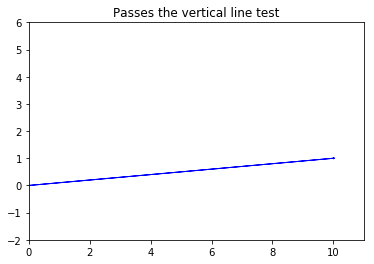

In [2]:
import matplotlib.pyplot as plt

# Vectors

output_vector = [10, 1]

# Plot the Vectors
plt.arrow(0,0, output_vector[0], output_vector[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(0,11)          
plt.ylim(-2,6)
plt.title("Passes the vertical line test")
plt.show()

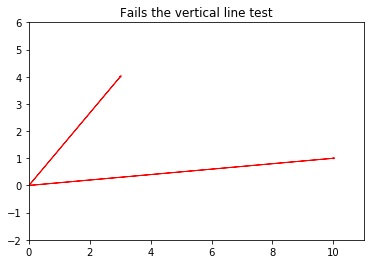

In [3]:
import matplotlib.pyplot as plt

# Vectors
input_vector = [3, 4]
output_vector = [10, 1]

# Plot the Vectors
plt.arrow(0,0, input_vector[0], input_vector[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, output_vector[0], output_vector[1],head_width=.05, head_length=0.05, color ='red')
plt.xlim(0,11)          
plt.ylim(-2,6)
plt.title("Fails the vertical line test")
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because they take on more than one f(x)=y values

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is the only function because all the points have one unique Y for one unique X

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

For **m** the input-dimension is 3 and the output-dimension is 3.

For **n** the input-dimension is 4 and the output-dimension is 2.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes,  something like m(x1, x2, x3) = (x1+3, 2*x2, 3*x^3, x2x3)

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [4]:
import numpy as np

# np.array([x_1, x_1]) = x_1(np.array([1, 0])) + x_2(np.array([0, 1]))

Transformation_Matrix_p = np.array([[1, 3], [-1, 2]])

print("Transformation_Matrix of p: \n", Transformation_Matrix_p)

Transformation_Matrix of p: 
 [[ 1  3]
 [-1  2]]


In [5]:
Transformation_Matrix_q = np.array([[4, 1, 2],
                                   [-1, 2, 3],
                                   [5, 1, -2]])

print("Transformation_Matrix of q: \n", Transformation_Matrix_q)

Transformation_Matrix of q: 
 [[ 4  1  2]
 [-1  2  3]
 [ 5  1 -2]]


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [6]:
# input_matrix = [3, 4] plugged into p equals np.array([15, 5])

input_matrix_p = np.array([3, 4])
input_matrix_q = np.array([3, 4, 5])

# Checking Transformation matrix of p and q:

print("Product of Transformation Matrix of p and input_matrix_p: ", np.dot(Transformation_Matrix_p, input_matrix_p))

print("\nProduct of Transformation Matrix of q and input_matrix_q: ", np.dot(Transformation_Matrix_q, input_matrix_q))

Product of Transformation Matrix of p and input_matrix_p:  [15  5]

Product of Transformation Matrix of q and input_matrix_q:  [26 20  9]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

If we think about matrices and operations of those matrices as transformations of space, then we can think of the Eigenvectors as the axis of rotation.  This axis of rotation does not change directions, but can only get scaled by the eigenvalues.  

So when we're dealing with a lot of features or dimensions in a machine learning problem, we want to filter the dimensions down to two dimensions that gives a lot of variation or information, we are transforming matrices, and as we go from higher dimension to lower dimension, we need those eigenvectors and eigenvalues to tell us how to represent higher dimensional data into lower dimensional (2) data that we can see and understand and work with.



# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

1. Difficult to explore and visualize data
2. Computational workload increases
3. Increasing dimensions without a corresponding increase in N (samples size) can lead to overfitting

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

N (sample size) must be at the very least equal to 5P where P = dimensions or features.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [7]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df_X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
from sklearn.decomposition import PCA

X = df_X.values

# Show some of the matrix
print("Some of the Data: \n", X[:10])

print("Data Shape: \n", X.shape)

# create PCA instance
pca = PCA(2)

# fit the data
pca.fit(X)

# access values and vectors
print("\nEigenvectors: \n", pca.components_)
print("\nEigenvalues: \n", pca.explained_variance_)

# transform the data
B = pca.transform(X)
print("\n Projected Data: \n", B)
print("\n Projected Data Shape: \n", B.shape)

Some of the Data: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Data Shape: 
 (150, 4)

Eigenvectors: 
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]

Eigenvalues: 
 [4.22484077 0.24224357]

 Projected Data: 
 [[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]
 [-2.50652679  0.65193501]
 [-2.61314272  0.02152063]
 [-2.78743398 -0.22774019]
 [-3.22520045 -0.50327991]
 [-2.64354322  1.1861949 ]
 [-2.38386932  1.34475434]
 [-2.6225262   0.81808967]
 [-2.64832273  0.31913667]
 [-2.19907796  0.87924409]
 [-2.58734619  0.52047364]
 [-2.3105317   0.39786782]
 [-2.54323491  0.44

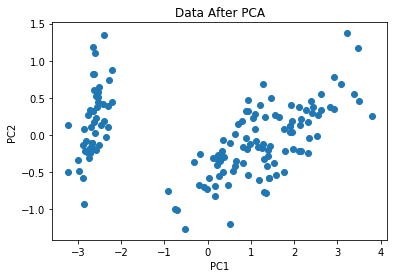

In [10]:
x = [i[0] for i in B]
y = [i[1] for i in B]

data = {"x": x, "y": y}

iris_df = pd.DataFrame(data)

import matplotlib.pyplot as plt


plt.scatter(iris_df['x'], iris_df['y'])
plt.title("Data After PCA")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [11]:
!pip3 install seaborn==0.9.0

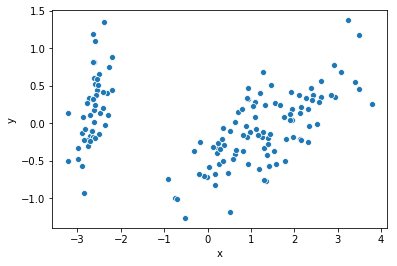

In [12]:

import seaborn as sns
  
ax = sns.scatterplot(x="x", y="y", data=iris_df)

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)